In [45]:
import pandas as pd 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as pyplot

Data Preprocessing

In [46]:
data = pd.read_csv('payment-practices.csv')

In [47]:
data.drop(columns=['Report Id','Start date', 'End date', 'Filing date', 'Company',
       'Company number','URL','Payments made in the reporting period'],axis=1,inplace=True)

In [48]:
data.columns

Index(['Average time to pay', '% Invoices paid within 30 days',
       '% Invoices paid between 31 and 60 days',
       '% Invoices paid later than 60 days',
       '% Invoices not paid within agreed terms',
       'Shortest (or only) standard payment period',
       'Longest standard payment period', 'Maximum contractual payment period',
       'Payment terms have changed', 'Suppliers notified of changes',
       'Participates in payment codes', 'E-Invoicing offered',
       'Supply-chain financing offered',
       'Policy covers charges for remaining on supplier list',
       'Charges have been made for remaining on supplier list'],
      dtype='object')

In [49]:
data

,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,% Invoices not paid within agreed terms,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list
0,25.0,77.0,20.0,3.0,89.0,30.0,60.0,60.0,False,NaN,False,True,False,False,False
1,69.0,7.0,28.0,65.0,0.0,30.0,NaN,75.0,False,NaN,False,False,False,False,False
2,21.0,89.0,9.0,2.0,47.0,2.0,30.0,30.0,False,NaN,False,False,False,True,True
3,14.0,90.0,8.0,2.0,31.0,2.0,30.0,30.0,False,NaN,False,False,False,True,True
4,15.0,96.0,2.0,2.0,14.0,2.0,30.0,30.0,False,NaN,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77676,27.0,62.0,37.0,1.0,52.0,0.0,NaN,60.0,False,NaN,False,False,False,False,False
77677,15.0,96.0,2.0,2.0,7.0,1.0,45.0,40.0,False,NaN,False,False,False,False,False
77678,17.0,91.0,9.0,0.0,9.0,30.0,NaN,60.0,False,NaN,False,True,False,False,False
77679,27.0,93.0,6.0,1.0,7.0,30.0,NaN,60.0,False,NaN,True,True,False,False,False


In [50]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().mean())*100})
missing_data

,total_missing,perc_missing
Average time to pay,6859,8.829701
% Invoices paid within 30 days,6859,8.829701
% Invoices paid between 31 and 60 days,6859,8.829701
% Invoices paid later than 60 days,6859,8.829701
% Invoices not paid within agreed terms,6708,8.635316
Shortest (or only) standard payment period,6708,8.635316
Longest standard payment period,30562,39.342954
Maximum contractual payment period,6708,8.635316
Payment terms have changed,6708,8.635316
Suppliers notified of changes,76016,97.856619


In [51]:
data.describe()

,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,% Invoices not paid within agreed terms,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period
count,70822.000000,70822.000000,70822.000000,70822.000000,70973.000000,70973.000000,47119.000000,70973.000000
mean,36.681300,55.978029,30.119553,13.896134,27.819875,20.522241,70.820073,73.439266
std,23.010175,28.461688,20.590250,16.762054,23.697790,21.603915,46.305430,86.101648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,24.000000,32.000000,13.000000,3.000000,9.000000,1.000000,60.000000,45.000000
50%,34.000000,58.000000,28.000000,7.000000,22.000000,14.000000,60.000000,60.000000
75%,46.000000,81.000000,45.000000,18.000000,41.000000,30.000000,90.000000,90.000000
max,1120.000000,100.000000,100.000000,100.000000,100.000000,1000.000000,1264.000000,5475.000000


In [52]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = ['Company_number', 'Company_number', 'Company', 'Payment_terms_have_changed', 'Suppliers_notified_of_changes', 'E-Invoicing_offered', 'Supply-chain_financing_offered','Policy covers charges for remaining on supplier list','Charges have been made for remaining on supplier list']

In [53]:
for var in numerical_cols:
    data[var].fillna(data[var].mean(), inplace=True)

C:\Users\krish\AppData\Local\Temp\ipykernel_19220\797122091.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[var].fillna(data[var].mean(), inplace=True)


In [54]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().mean())*100})
missing_data

,total_missing,perc_missing
Average time to pay,0,0.000000
% Invoices paid within 30 days,0,0.000000
% Invoices paid between 31 and 60 days,0,0.000000
% Invoices paid later than 60 days,0,0.000000
% Invoices not paid within agreed terms,0,0.000000
Shortest (or only) standard payment period,0,0.000000
Longest standard payment period,0,0.000000
Maximum contractual payment period,0,0.000000
Payment terms have changed,6708,8.635316
Suppliers notified of changes,76016,97.856619


In [55]:
categorical_cols = ['Payment terms have changed', 'Suppliers notified of changes', 'E-Invoicing offered', 'Supply-chain financing offered','Policy covers charges for remaining on supplier list','Charges have been made for remaining on supplier list']

<Axes: xlabel='Payment terms have changed'>

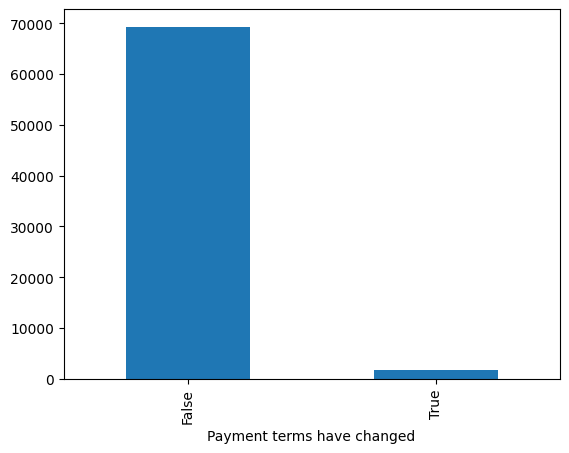

In [56]:
data['Payment terms have changed'].value_counts().plot.bar()

<Axes: xlabel='Suppliers notified of changes'>

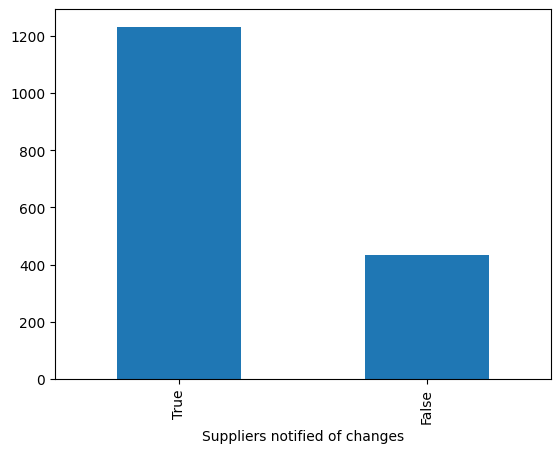

In [57]:
data['Suppliers notified of changes'].value_counts().plot.bar()

<Axes: xlabel='E-Invoicing offered'>

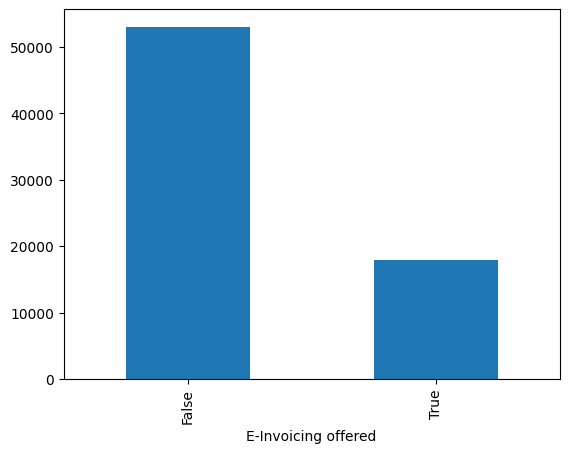

In [58]:
data['E-Invoicing offered'].value_counts().plot.bar()

<Axes: xlabel='Supply-chain financing offered'>

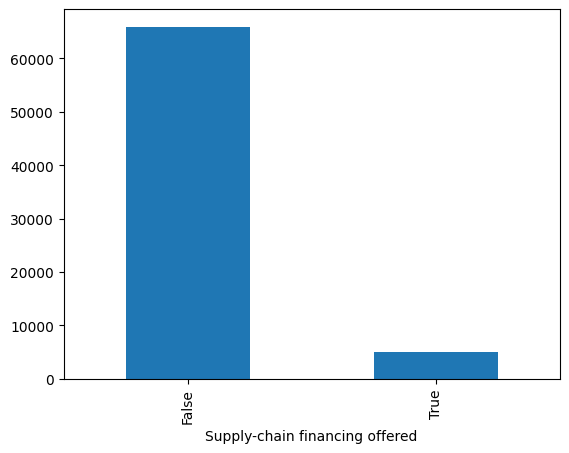

In [59]:
data['Supply-chain financing offered'].value_counts().plot.bar()

<Axes: xlabel='Policy covers charges for remaining on supplier list'>

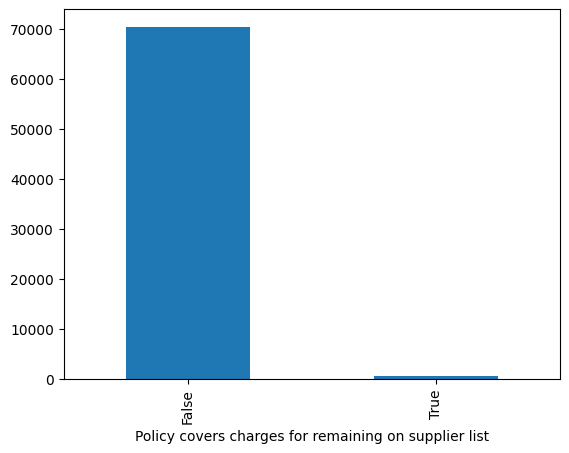

In [60]:
data['Policy covers charges for remaining on supplier list'].value_counts().plot.bar()

<Axes: xlabel='Charges have been made for remaining on supplier list'>

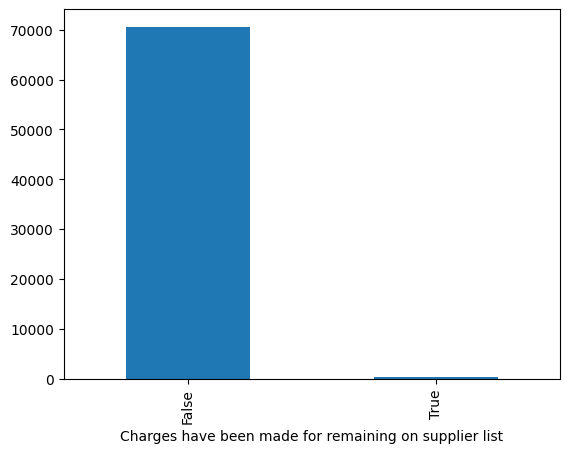

In [61]:
data['Charges have been made for remaining on supplier list'].value_counts().plot.bar()

In [62]:
data.isnull().sum()

Average time to pay                                          0
% Invoices paid within 30 days                               0
% Invoices paid between 31 and 60 days                       0
% Invoices paid later than 60 days                           0
% Invoices not paid within agreed terms                      0
Shortest (or only) standard payment period                   0
Longest standard payment period                              0
Maximum contractual payment period                           0
Payment terms have changed                                6708
Suppliers notified of changes                            76016
Participates in payment codes                                0
E-Invoicing offered                                       6708
Supply-chain financing offered                            6708
Policy covers charges for remaining on supplier list      6708
Charges have been made for remaining on supplier list     6708
dtype: int64

In [65]:
label_encoders = {}
data_complete = {}
data_missing = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data_complete[col] = label_encoders[col].fit_transform(data_complete[col])
    data_missing[col] = label_encoders[col].transform(data_missing[col])

KeyError: 'Payment terms have changed'